# Einleitung

Die Riemann-Zeta-Funktion wird wie folgt definiert $\zeta(s)=\sum\nolimits_{n=1}^\infty\frac{1}{n^s}=\frac{1}{1^s}+\frac{1}{2^s}+\frac{1}{3^s}+...$
Es gibt im Allgemeinen viele Varianten die Riemann-Zeta-Funktion numerisch zu beschreiben. Wir verwenden hier die Methode über die Konvergenz von alternierenden Reihen.\
Zudem wird ein Beispiel dargestellt warum eine numerische Annäherung verwendet werden sollte. In diesem Fall beschäftigen wie uns mit der Riemann-Zeta-Funktion im Bezug auf $\zeta(2)$.

# Einfache Summe

In [4]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


#Entwicklungspunkt von Zeta
s = 2
zeta_1 = 0
eps = 1*10**(-15)
N_1= 10**15


for n in range(1,N_1+1):
    zeta_2=zeta_1
    zeta_1=zeta_1+(1/n**s)
    if abs(zeta_2-zeta_1)<eps:
        print('Durchlauf: ', n)
        print('Zeta_2: ',zeta_2)
        print('Zeta_1: ',zeta_1)
        print('Delta: ',1/n**s)
        print('Difference: ',zeta_1-zeta_2)
        print('$2*\pi/6:$',np.pi**2/6)
        break

Durchlauf:  31635422
Zeta_2:  1.6449340353029747
Zeta_1:  1.6449340353029756
Delta:  9.992007142506634e-16
Difference:  8.881784197001252e-16
$2*\pi/6:$ 1.6449340668482264


Es ist zu erkennen dass die Differenz zwischen Zeta_1 und Zeta_2 nicht dem hinzuaddierten Term entspricht. Somit ist davon auszugehen dass die Maschinengenauigkeit nicht ausreicht um über einfache Summation die gewünschte Genauigkeit zu erhalten.

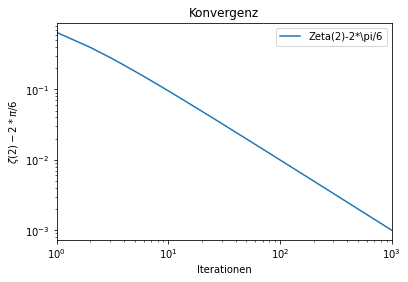

In [13]:
def Zeta(N):
    zeta_1=0
    for n in range(1,N+1):
        zeta_2=zeta_1
        zeta_1=zeta_1+(1/n**s)
    return zeta_1
    
N=range(1,1000)

#Plot
plt.plot(N,[abs(Zeta(n)-np.pi**2/6) for n in N],label='Zeta(2)-2*\pi/6')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iterationen')
plt.ylabel('$\zeta(2)-2*\pi/6$')
plt.title('Konvergenz')


plt.xlim(1,10**3)

# show a legend on the graph
plt.legend()

# show graph
plt.show()


# Fortgeschrittene Reihenbildung

In [ ]:
Schnellere Konvergenz von Thermen

In [83]:
s = 2

#Verwende alternierende Reihe (-> Dirichlet Etafunktion)
eta_1 = 0
eps = 1*10**(-15)

N_1= 10**15

for n in range(1,N_1+1):
    eta_2 = eta_1
    eta_1 = eta_1 + (-1)**(n+1)/n**s
    if abs(abs(eta_2)-abs(eta_1))<eps:
        break
print(eta_1*(1-2**(1-s)))
print(n)

0.4112335167120395
30791659


# Bestes Konvergenzverhalten

In [65]:
import numpy as np
import math as m

#Anfangswerte
s = 2

#Berechnet Koeffizienten d
def d(k,n):
    d = 0
    for j in range(k,n+1):
        d = d + n*m.factorial(n+j-1)*4**j/(m.factorial(n-j)*m.factorial(2*j))
    return d


#Berechne die Riemann Zeta funktion
def Zeta(n):
    Zeta = 0
    for k in range(1,n+1):
        Zeta = Zeta + ((-1)**(k-1)*d(k,n))/(d(0,n)*(1-2**(1-s))*k**s)
    return Zeta

print(np.pi**2/6 - Zeta(22))    

-2.220446049250313e-16


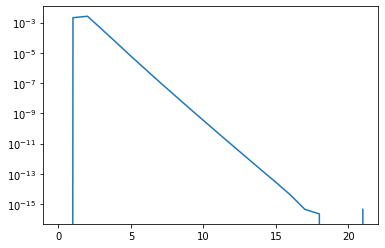

In [72]:
import matplotlib.pyplot as plt

#Betrache Konvergenzverhalten
Zeta_vals = []
for i in range(1,22+1):
    Zeta_vals.append(Zeta(i)-np.pi**2/6)
    #print(Zeta_vals)



plt.plot(Zeta_vals)
plt.yscale('log')